<a href="https://colab.research.google.com/github/vpagonis/CRCbook/blob/main/Chapter_3_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3 - Integration

This notebook contains the code for the example problems found in Chapter 3.

**Example 3.1: An example of integration by parts**

In [1]:
%reset -f

from sympy import symbols, integrate, cos, sin
x = symbols('x')
n = symbols('n', positive=True)  # define symbols

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print("The indefinite cosine integral = ",integrate(x*cos(n*x),x))
print("The indefinite sine integral = ",integrate(x*sin(n*x),x))

---------------------------- CODE OUTPUT ----------------------------- 

The indefinite cosine integral =  x*sin(n*x)/n + cos(n*x)/n**2
The indefinite sine integral =  -x*cos(n*x)/n + sin(n*x)/n**2


**Example 3.2: An example of the parametric integration method**

In [2]:
%reset -f

from sympy import symbols, integrate, exp, oo
x, t = symbols('x,t', real=True,positive=True)   # define symbols

int1 = integrate(x*exp(-x*t),(x,0,oo))
int2 = integrate(x**2.0*exp(-x*t),(x,0,oo))

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print("The definite integral of x*exp(-x*t) =     ",int1,'\n')
print("The definite integral of x**2.0*exp(-x*t) =",int2)

---------------------------- CODE OUTPUT ----------------------------- 

The definite integral of x*exp(-x*t) =      t**(-2) 

The definite integral of x**2.0*exp(-x*t) = 2.0/t**3.0


**Example 3.3: Integration of Newton's law**

In [3]:
%reset -f

from sympy import symbols, integrate
t, F0, m = symbols('t, F0, m',real=True)    # define symbols

print('-'*28,'CODE OUTPUT','-'*29,'\n')
int1=integrate(F0/m*(1/(t**2+1)),t)
print('The indefinite integral of F0/m*(1/(t**2+1))=',int1)

---------------------------- CODE OUTPUT ----------------------------- 

The indefinite integral of F0/m*(1/(t**2+1))= F0*atan(t)/m


**Example 3.4: Expectation value of the position**

In [4]:
%reset -f

import sympy as sym
# symbolic integration with sympy.integrate
from scipy import integrate      # numerical integration with quad()

x = sym.symbols('x')             # define symbols
int0 = sym.integrate(x**3,(x,0,1))+sym.integrate(x*((2-x)**2),(x,1,2))
print('-'*28,'CODE OUTPUT','-'*29,'\n')
print("Integral using sympy: ",int0)  # integral using sympy

f = lambda x: x**3                    # function for interval 0<x<1
int1 = integrate.quad(f,0,1)          # first integral
print("Integral and error: ",int1)    # integral and error

g = lambda x: x*((2-x)**2)            # function for interval 1<x<2
int2 = integrate.quad(g,1,2)          # second integral and error
print("Integral and error: ",int2,'\n')  # integral and error

print("Integral sum: ", f'{(int1[0]+int2[0]):.4f}') # sum of integrals

---------------------------- CODE OUTPUT ----------------------------- 

Integral using sympy:  2/3
Integral and error:  (0.25, 2.7755575615628914e-15)
Integral and error:  (0.41666666666666674, 4.625929269271486e-15) 

Integral sum:  0.6667


**Example 3.5: Center of mass of a rod**

In [5]:
%reset -f

import sympy as sym
from scipy import integrate
x, L = sym.symbols('x,L')

int1 = integrate.quad(lambda x: 2*x**2, 0,1) # 1st integral numerically
int2 = integrate.quad(lambda x: 2*x, 0,1)    # second integral

# X_cm is the ratio of the two integrals
print('-'*28,'CODE OUTPUT','-'*29,'\n')
print("numerically evaluated X_cm: ", f'{(int1[0]/int2[0]):.4f}')

symb=sym.integrate(2*x**2,(x,0,L))/sym.integrate(2*x,(x,0,L))
print("symbolically evaluated X_cm: ",symb)

---------------------------- CODE OUTPUT ----------------------------- 

numerically evaluated X_cm:  0.6667
symbolically evaluated X_cm:  2*L/3


**Example 3.6: Evaluation of Fourier coefficients for periodic  function**

In [6]:
%reset -f

from sympy import symbols, integrate, sin, cos, pi
x = symbols('x')        # define symbols
n = symbols('n', integer = True,positive=True)

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print("Fourier coefficients an=",integrate(x*cos(n*x),(x,-pi,pi))/pi)

print("\nFourier coefficients bn=",integrate(x*sin(n*x),(x,-pi,pi))/pi)

---------------------------- CODE OUTPUT ----------------------------- 

Fourier coefficients an= 0

Fourier coefficients bn= -2*(-1)**n/n


**Example 3.7: Using the error function in Quantum Mechanics**

In [7]:
%reset -f

from sympy import symbols, integrate, exp, oo, solve, sqrt

x, m, omega, hbar, A = symbols('x, m, omega, hbar, A',positive=True)

# Evaluate total probability Ptotal and set =1
lhs = integrate((A*exp(-m*omega/(2*hbar)*x**2))**2,(x,-oo,oo))

# symbolically solve equation Ptotal=1
A1 = solve(lhs-1,A)

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print("Normalization constant A = ",A1[0])

# find <x>
expectx=integrate(x*(A1[0]*exp(-m*omega/(2*hbar)*x**2))**2,\
(x,-oo,oo))
print('Expectation value of x: ',expectx)

---------------------------- CODE OUTPUT ----------------------------- 

Normalization constant A =  m**(1/4)*omega**(1/4)/(pi**(1/4)*hbar**(1/4))
Expectation value of x:  0


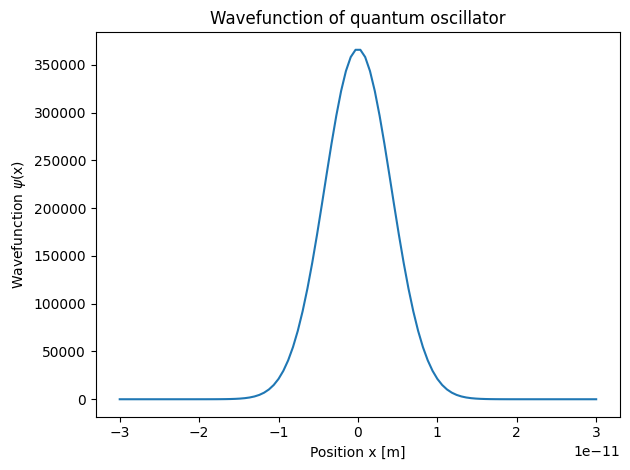

In [8]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

m = 1.163e-26     # effective vibrational mass of nitrogen molecule
omega = 5.16e14   # molecular vibration freqeuncy
hbar = 1.0545e-34 # hbar in J.s

#normalization constant A
A = m**(1/4)*omega**(1/4)/(np.pi**(1/4)*hbar**(1/4))

# define qavefunction f
f = lambda x: A*np.exp(-m*omega/(2*hbar)*x**2)

x1=np.linspace(-.3e-10,.3e-10,100)

# plot wave function
plt.plot(x1,f(x1))
plt.title('Wavefunction of quantum oscillator')
plt.xlabel('Position x [m]')
plt.ylabel('Wavefunction $\psi$(x)')
plt.tight_layout()
plt.show()

**Example 3.8: The Hermite polynomials**

---------------------------- CODE OUTPUT ----------------------------- 

The integral =  (0.0, 0.0)


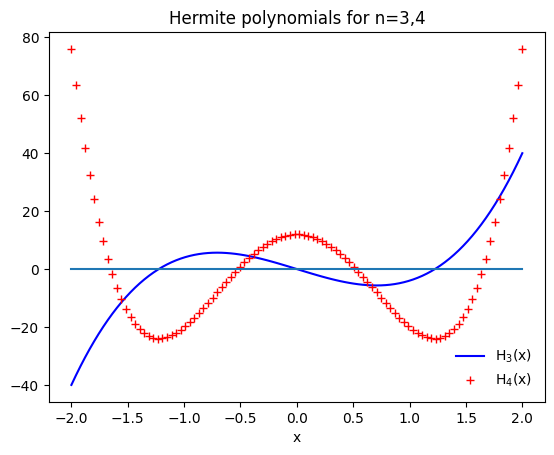

In [9]:
%reset -f

from scipy import special, integrate
import matplotlib.pyplot as plt
import numpy as np

p4 = special.hermite(4) # Hermite polynomial n=4
p3 = special.hermite(3) # Hermite polynomial n=3

# define integrand function
f = lambda x: special.eval_hermite(3,x)*special.eval_hermite(4,x)*\
np.exp(-x**2)
print('-'*28,'CODE OUTPUT','-'*29,'\n')

# evaluate integral from x=-oo to x=+oo
print('The integral = ',integrate.quad(f,-np.inf,np.inf))

x1 = np.linspace(-2,2, 100)  # define x-values for plot

plt.title('Hermite polynomials for n=3,4')
plt.plot(x1,p3(x1),'b-',label='H$_3$(x)')
plt.plot(x1,p4(x1),'r+',label='H$_4$(x)')
plt.xlabel('x')
plt.plot(x1,[0]*len(x1))
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.show()

**Example 3.9: The Maxwell-Boltzmann  distribution**

---------------------------- CODE OUTPUT ----------------------------- 

average speed v:  2*sqrt(2)*sqrt(T)*sqrt(k)/(sqrt(pi)*sqrt(m))


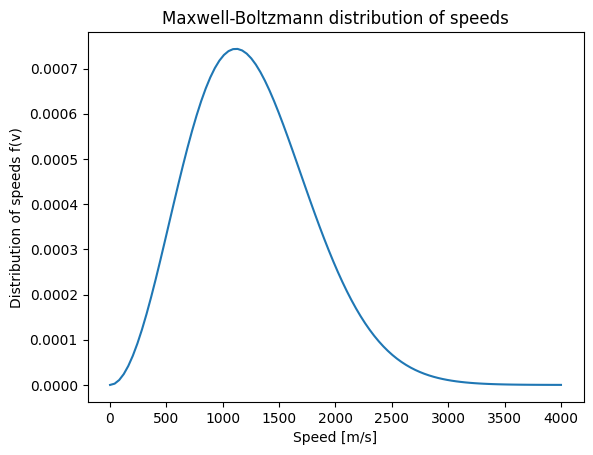

In [10]:
%reset -f

from sympy import symbols, sqrt, pi, exp, integrate, oo, simplify
import matplotlib.pyplot as plt
import numpy as np

v, m, k, T = symbols('v,m,k,T',positive=True)  # define symbols

# find average speed
f1 = sqrt(2/pi*((m/(k*T))**3))*v**3*exp(-m*v**2/(2*k*T))
int1 = integrate(f1,(v,0,oo))
print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('average speed v: ',simplify(int1))

# Plot MB distribution of speeds for nitrogen
m = 6.6464731e-27  # atomic mass nitrogen in kg
T = 300            # room temeprature in K
k = 1.380649e-23   # Boltzmann constant in J/K

v1 = np.linspace(1,4000,100)          # speed values for plot

a = np.sqrt(2/np.pi*((m/(k*T))**3))
b = m/(2*k*T)
f = lambda v: a*v**2*np.exp(-b*v**2)  # define function for MB

plt.plot(v1,f(v1))
plt.title('Maxwell-Boltzmann distribution of speeds')
plt.xlabel('Speed [m/s]')
plt.ylabel('Distribution of speeds f(v)')
plt.show()

**Example 3.10: Error function: applying the trapezoidal rule**

In [11]:
%reset -f

from scipy import  integrate
import numpy as np

f = lambda x: np.exp(-x**2/2)   # define function

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('integrate with quad:  ',integrate.quad(f,0,1)[0],'\n')
x1 = np.linspace(0,1,10)

print('integrate with trapz() and N=10: ',integrate.trapz(f(x1),x1))

x1=np.linspace(0,1,100)
print('integrate with trapz() and N=100:',integrate.trapz(f(x1),x1))

---------------------------- CODE OUTPUT ----------------------------- 

integrate with quad:   0.855624391892149 

integrate with trapz() and N=10:  0.855000132137889
integrate with trapz() and N=100: 0.8556192348272017


**Example 3.11: Error function: applying Simpson's rule**

In [12]:
%reset -f

from scipy import  integrate
import matplotlib.pyplot as plt
import numpy as np

f = lambda x: np.exp(-x**2/2)  # define function

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('integrate with quad:           ',integrate.quad(f,-1,1)[0],'\n')
x1 = np.linspace(-1,1,10)

print('integrate with simps() and N=10: ',integrate.simps(f(x1),x1))
x1 = np.linspace(-1,1,100)
print('integrate with simps() and N=100:',integrate.simps(f(x1),x1))

---------------------------- CODE OUTPUT ----------------------------- 

integrate with quad:            1.7112487837842973 

integrate with simps() and N=10:  1.711422150923532
integrate with simps() and N=100: 1.7112487946132824
